In [1]:
import faker #biblioteca para gerar dados falsos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
players = [] #lista de jogadores
for _ in range(10000): # adicionando 10000 jogadores
    fake = faker.Faker()
    players.append(fake.name()) #usando a bilbioteca para gerar nomes dos jogadores

players

['Julie Gutierrez',
 'Dr. Virginia Glass MD',
 'Kelli Gonzales',
 'Joshua Fowler',
 'Yolanda Paul',
 'Thomas Nicholson',
 'Robert Ramirez',
 'Thomas Cameron',
 'Brian Phillips',
 'Darren Shields',
 'Jason Benjamin',
 'Andrew Garcia',
 'Rachel Mclaughlin DDS',
 'Hannah Powell',
 'Pamela Wolfe',
 'Lisa Scott',
 'Taylor Jones',
 'Latoya Smith',
 'Brian Crawford',
 'Kathryn Willis',
 'Lori Potts',
 'Kevin Foster',
 'Susan Gamble',
 'Lonnie Garcia',
 'Yolanda Miller',
 'Susan Miller',
 'Bill Robinson',
 'Michael Johnson',
 'Joseph Flores',
 'Mario Anderson',
 'Andrew Gonzalez',
 'Jessica Bryant',
 'Jennifer Powell',
 'Brandy Spence',
 'Matthew Davis',
 'Melissa Chambers',
 'Joseph Young',
 'Beth Smith',
 'Melissa Cruz',
 'Lori Ray',
 'Craig Scott',
 'Amber Thomas',
 'Michelle Parker',
 'Mary Garrett',
 'Samantha Jennings',
 'Steven Rodriguez',
 'Nicole Jones',
 'Paul Landry',
 'Chad Hoover',
 'Jessica Allen',
 'Joshua Berry',
 'Victoria Mitchell',
 'Linda Goodman',
 'Stephanie Ayala',
 'Daw

Aqui usei a distribuição de poisson pois ela utiliza apenas números inteiros maior ou igual a 0

In [3]:
killsPerPerson = np.random.poisson(12.5, 10000) # media de kills por pessoa
deathsPerPerson = np.random.poisson(18, 10000) # media de mortes por pessoa
ranks = ["Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master"]
rankPerPerson = np.random.choice(ranks, 10000, p=[0.4, 0.3, 0.15, 0.1, 0.04, 0.01]) # distribuicao de ranks, onde o ranks é o que vai ser distribuido, o p é a probabilidade de cada rank ser escolhido, e o 10000 é a quantidade de vezes que vai ser escolhido

In [4]:
matches = np.random.poisson(100, 10000) # quantidade de partidas jogadas por pessoa
df = pd.DataFrame({"Player": players, "Kills": killsPerPerson, "Deaths": deathsPerPerson, "Rank": rankPerPerson, "Matches": matches}) # criando um dataframe com os dados gerados
df.head() # mostrando as primeiras 5 linhas do dataframe

,Player,Kills,Deaths,Rank,Matches
0,Julie Gutierrez,16,18,Silver,97
1,Dr. Virginia Glass MD,16,20,Bronze,105
2,Kelli Gonzales,19,10,Bronze,89
3,Joshua Fowler,10,16,Silver,110
4,Yolanda Paul,17,18,Bronze,109


Vendo a média, moda e mediana na quantidade de partidas de cada jogador

In [5]:
df['Matches'].mean() # media

np.float64(99.9159)

In [6]:
df['Matches'].median() # mediana

100.0

In [7]:
df['Matches'].mode() # moda

0    99
Name: Matches, dtype: int64

Calculando a variância e o desvio padrão na média de kills por pessoa

In [8]:
df['Kills'].var() # variancia

12.671913551355075

In [9]:
df['Kills'].std() # desvio padrão

3.5597631313551013

Usando porcentile para ver o nível dos jogadores

In [ ]:
np.percentile(df['Kills'], 90) # Vendo o percentil 90, ou seja, 90% dos jogadores tem até no máximo uma média de 17 kills

np.float64(17.0)

Ou seja, 90% dos jogadores tem até no máximo uma média de 17 kills

In [12]:
# Criando a chance de vitória para cada rank
win = {
    "Bronze": 0.09,
    "Silver": 0.15,
    "Gold": 0.46,
    "Platinum": 0.7,
    "Diamond": 0.85,
    "Master": 0.9
}


# Usando a distribuição binomial para calcular a quantidade de vitórias por jogador com base no rank e na quantidade de partidas jogadas
df["Wins"] = [
    np.random.binomial(n=matches, p=win[rank])
    for rank, matches in zip(df["Rank"], df["Matches"])
]


df.head() #
                                 

,Player,Kills,Deaths,Rank,Matches,Wins
0,Julie Gutierrez,16,18,Silver,97,20
1,Dr. Virginia Glass MD,16,20,Bronze,105,7
2,Kelli Gonzales,19,10,Bronze,89,8
3,Joshua Fowler,10,16,Silver,110,20
4,Yolanda Paul,17,18,Bronze,109,16


In [13]:
df.sort_values(by="Wins", ascending=False).head(10) # mostrando os 10 jogadores com mais vitórias

,Player,Kills,Deaths,Rank,Matches,Wins
2164,Elizabeth Crawford,15,14,Master,116,110
8837,Rebecca Montgomery,10,13,Diamond,125,110
6110,Lisa Lopez,11,17,Master,117,109
8572,Robert Dalton,10,20,Master,122,109
5240,Jessica Oconnor,14,24,Master,118,107
9968,Lori Richardson,7,17,Master,114,106
7701,Barbara Hansen,14,18,Master,116,106
371,Sara Casey,14,20,Diamond,115,106
2786,Brian Bonilla,10,13,Master,116,105
4222,Ian Jackson,15,24,Master,112,105


Deu certo a atribuição, agora a coluna de vitórias tem relação direta com o rank do jogador, porém não tem relação com os status de kills e mortes nas partidas. Vou tentar vizualizar isso agora através de algum gráfico

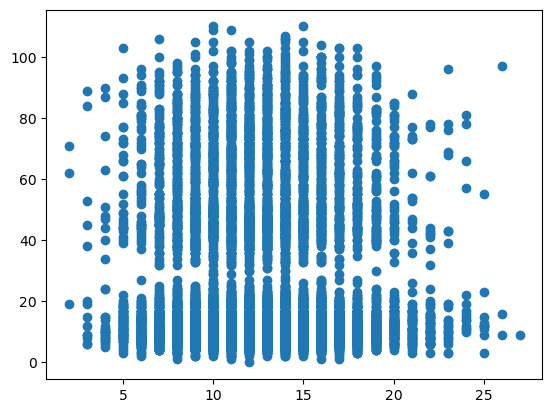

In [ ]:
plt.scatter(df['Kills'], df['Wins']) # grafico de dispersão
plt.show()

Realmente não tem nada haver a relação entre os dois, como era esperado

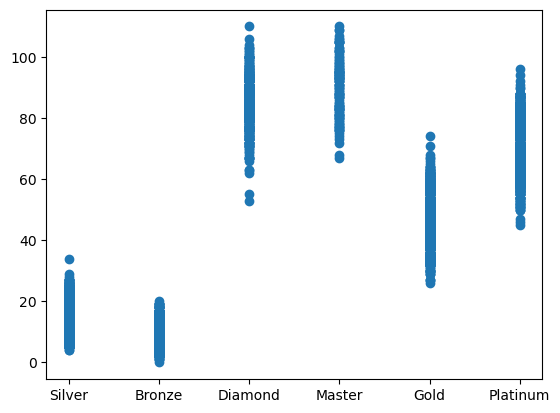

In [ ]:
plt.scatter(df['Rank'], df['Wins']) # gráfico de dispersão
plt.show()

Aqui já é possível ver uma distribuição melhor, porém não é o melhor gráfico para mostrar

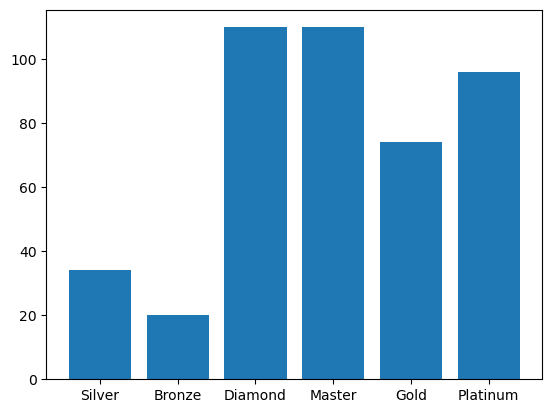

In [ ]:
plt.bar(df['Rank'], df['Wins']) #grafico de barras
plt.show()

Agora sim, é possível ver que tem uma relação grande entre o rank e a quantidade de vitórias

Agora quero ver a correlação e covariância entre a quantidade de kills e de vitórias, que é para ter certeza que tem 0 relação, pra isso vou utilizar as funções próprias do numpy mesmo.

In [ ]:
np.corrcoef(df['Kills'], df['Wins']) # usando o numpy para calcular a correlação 

array([[ 1.        , -0.01052997],
       [-0.01052997,  1.        ]])

A correlação deu quase 0, o que significa que não existe uma relação significativa entre esses dois dados

In [ ]:
np.cov(df['Kills'], df['Wins']) # usando o numpy para calcular a covariância

array([[ 12.67191355,  -0.92486653],
       [ -0.92486653, 608.78203976]])

O valor da covariância também está próximo de 0 e é bem pequeno comparado com a variância da quantidade de vitórias e kills, ou seja, também prova que não há relação entre eles

Calculando agora algumas probabilidades

In [22]:
# chance de ganhar uma partida, considerando que fosse algo completamente aleatório
wins = df['Wins'].sum()
matches = df['Matches'].sum()
probability = wins / matches
probability * 100

np.float64(26.02808962337326)

A chance geral de ganhar nesse caso seria de 26%

In [ ]:
# criando agrupamento por rank no pandas
group = df.groupby('Rank').sum()[['Wins', 'Matches']]
group['Probability'] = group['Wins'] / group['Matches'] * 100
group

,Wins,Matches,Probability
Rank,,,
Bronze,35945,400943,8.965115
Diamond,32730,38437,85.152327
Gold,66935,145348,46.051545
Master,10693,11843,90.289623
Platinum,67950,96903,70.121668
Silver,45809,305685,14.985688


A probabilidade bate com a que eu defini manualmente anteriomente, então está certo

In [26]:
# chance de vencer e ser de tal rank, caso fossem independentes (que não são)
group['Probability'] = group['Wins'] / matches * 100
group

,Wins,Matches,Probability
Rank,,,
Bronze,35945,400943,3.597526
Diamond,32730,38437,3.275755
Gold,66935,145348,6.699134
Master,10693,11843,1.070200
Platinum,67950,96903,6.800719
Silver,45809,305685,4.584756


Deu um valor completamente aleatório e errado, justamente porque não são eventos independentes ou aleatórios

In [27]:
# chance de ser de um rank considerando que ele venceu, agora sim tendo relação
group['Probability Rank'] = group['Probability'] / probability
group

,Wins,Matches,Probability,Probability Rank
Rank,,,,
Bronze,35945,400943,3.597526,13.821704
Diamond,32730,38437,3.275755,12.585460
Gold,66935,145348,6.699134,25.738093
Master,10693,11843,1.070200,4.111712
Platinum,67950,96903,6.800719,26.128385
Silver,45809,305685,4.584756,17.614646


In [29]:
group['Probability Rank'].sum() # a soma de todas as probabilidades deve ser 100%

np.float64(100.0)